# Heating Days Calculation

## Calculating heating days per province

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bass/City daily average atmosphere temperature1981-2023.xlsx')

In [ ]:
data = data.drop('数据说明', axis = 1)

In [ ]:
data

,Province,City ID,City,Province ID,19810101,19810102,19810103,19810104,19810105,19810106,...,20240621,20240622,20240623,20240624,20240625,20240626,20240627,20240628,20240629,20240630
0,Anhui,340000.0,Anqing,340800.0,1.987209,-0.824204,0.788442,3.754853,1.989129,0.966078,...,27.060385,25.240903,23.747676,23.837999,22.212763,23.127585,22.806589,23.781277,24.657786,26.041176
1,Anhui,340000.0,Bengbu,340300.0,-1.642303,-3.273626,-1.867314,0.883092,0.725046,0.841808,...,26.501517,27.344303,28.650746,26.927880,25.681532,26.516383,26.265362,25.185151,25.384466,27.970283
2,Anhui,340000.0,Bozhou,341600.0,-2.759570,-3.285425,-1.765172,0.646212,0.076015,0.420612,...,26.350175,28.548685,30.581448,27.740299,27.865381,28.005548,27.810136,25.776549,26.513639,29.540299
3,Anhui,340000.0,Chizhou,341700.0,0.946215,-1.976026,-0.065751,3.297718,2.050538,1.274496,...,26.051747,24.083656,22.126958,21.882781,20.445815,21.482306,21.432106,22.999325,23.989072,24.320731
4,Anhui,340000.0,Chuzhou,341100.0,-0.698006,-3.026362,-2.071806,0.974144,0.947832,0.825355,...,26.723648,26.389538,26.098142,26.161973,24.501436,25.179152,24.583320,24.404941,25.342963,27.072907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Zhejiang,330000.0,Taizhou,331000.0,4.117721,-1.718656,-0.814143,2.403791,4.019528,3.264566,...,27.490565,29.397880,26.640933,24.388240,23.003303,24.812682,25.774032,26.934031,28.732433,28.487425
369,Zhejiang,330000.0,Wenzhou,330300.0,9.259294,2.882507,2.231113,5.086321,6.950081,6.715211,...,28.736545,30.798154,30.149365,26.925194,25.297180,26.152772,27.144611,28.346093,29.974047,30.018995
370,Zhejiang,330000.0,Zhoushan,330900.0,4.176454,-0.110110,0.075199,4.151913,6.071927,4.817723,...,27.265756,28.836314,24.758078,24.023349,22.043003,24.040380,25.079847,26.334273,27.483025,27.362686
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# typically use 18 degrees Celsius for calculating Heating Degree Days (HDD) in China.
temperature_threshold = 18  # Threshold for heating days

# Melt the DataFrame to make it easier to work with dates
melted_df = data.melt(id_vars=['Province', 'City ID', 'City', 'Province ID'],
                         var_name='Date', value_name='Temperature')

# Convert 'Date' column to datetime
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%Y%m%d')

# Extract the year from 'Date' to enable annual aggregation
melted_df['Year'] = melted_df['Date'].dt.year

# Calculate heating days for each city by year
# Heating days are defined as days where the temperature is below the threshold
heating_days = melted_df[melted_df['Temperature'] < temperature_threshold] \
    .groupby(['Province', 'Province ID', 'City', 'City ID', 'Year']).size().reset_index(name='Heating Days')

# Average heating days by province
average_heating_days_province = heating_days.groupby(['Province', 'Province ID', 'Year'])['Heating Days'] \
    .mean().reset_index(name='Average Heating Days')

In [ ]:
melted_df['Temperature'].describe()

,Temperature
count,5.894074e+06
mean,1.413729e+01
std,1.125389e+01
min,-3.903303e+01
25%,6.752878e+00
50%,1.623890e+01
75%,2.315457e+01
max,3.642816e+01


<Axes: >

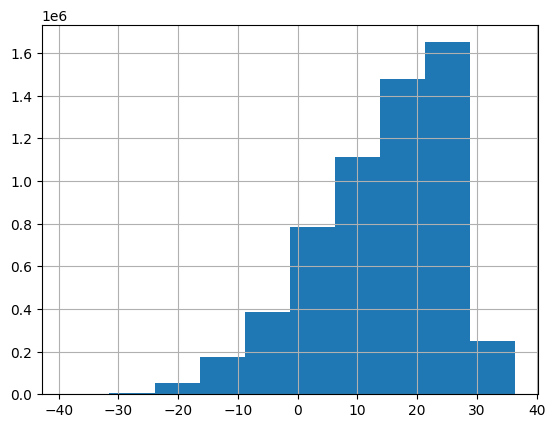

In [ ]:
melted_df['Temperature'].hist()

In [ ]:
# Creating a new DataFrame with average heating days per province
average_heating_days_province_final = average_heating_days_province.groupby('Province', as_index=False) \
    .agg({'Average Heating Days': 'mean'}) \
    .rename(columns={'Average Heating Days': 'Average Heating Days per Province'})

average_heating_days_province_final

,Province,Average Heating Days per Province
0,Anhui,197.188920
1,Aomen (Macao),77.159091
2,Beijing,224.681818
3,Chongqing,192.068182
4,Fujian,146.593434
5,Gansu,292.623377
6,Guangdong,90.622294
7,Guangxi,109.883117
8,Guizhou,194.901515
9,Hainan,27.281013


In [ ]:
# Filter the df by provinces with NPPs

provinces = ['Fujian', 'Guangdong', 'Guangxi', 'Hainan', 'Hebei', 'Jiangsu', 'Shandong', 'Zhejiang', 'Liaoning']

filtered_df = average_heating_days_province_final[average_heating_days_province_final['Province'].isin(provinces)]

filtered_df

,Province,Average Heating Days per Province
4,Fujian,146.593434
6,Guangdong,90.622294
7,Guangxi,109.883117
9,Hainan,27.281013
10,Hebei,222.559917
15,Jiangsu,195.952797
18,Liaoning,241.045455
22,Shandong,215.237216
32,Zhejiang,180.559917


In [ ]:
# Average heating days by province
average_heating_days_city= heating_days.groupby(['City', 'City ID', 'Year'])['Heating Days'] \
    .mean().reset_index(name='Average Heating Days')

# Creating a new DataFrame with average heating days per city
average_heating_days_city_final = average_heating_days_city.groupby('City', as_index=False) \
    .agg({'Average Heating Days': 'mean'}) \
    .rename(columns={'Average Heating Days': 'Average Heating Days per City'})

average_heating_days_city_final

,City,Average Heating Days per City
0,Aba,348.636364
1,Akesudiqu,243.977273
2,Alaer,223.954545
3,Alashanmeng,250.818182
4,Aletaidiqu,279.545455
...,...,...
360,Zhuzhou,178.022727
361,Zibo,214.431818
362,Zigong,193.363636
363,Ziyang,188.704545


In [ ]:
# Filter the df by cities with NPPs

cities = ['Changchun','Cheban','Changjiang','Chixi','DALIAN','Fangchenggang','Fuging','Guangpo', 'Haiyang','Hepu','Huangbu','Huizhou','Huludao', 'Jiaxing',
             'Jiangshan','Jieshi', 'Lianjiang', 'Lianyungang','Lufeng','Lieyu','Lizifang','Ningde','Qinshan',
          'Shenzhen', 'SHENZHEN CITY', 'Shidaowan', 'Taishan', 'Taimushan','Taizhou', 'Wenzhou','Xiaguan','Xiangfang','Xin an','Xudapu', 'Yangjiang', 'Zhangxing','Zhangzhou']

filtered_df_cities= average_heating_days_city_final[average_heating_days_city_final['City'].isin(cities)]

filtered_df_cities

,City,Average Heating Days per City
35,Changchun,257.340909
39,Changjiang,27.727273
74,Fangchenggang,82.704545
122,Huizhou,89.227273
123,Huludao,232.545455
131,Jiaxing,182.363636
163,Lianyungang,208.068182
202,Ningde,155.863636
245,Shenzhen,73.340909
264,Taizhou,190.102273


In [ ]:
# Define temperature threshold for heating days
temperature_threshold = 18  # Threshold for heating days

# Melt the DataFrame to make it easier to work with dates
melted_df = data.melt(id_vars=['Province', 'City ID', 'City', 'Province ID'],
                         var_name='Date', value_name='Temperature')

# Convert 'Date' column to datetime
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%Y%m%d')

# Filter only winter months (November to March)
winter_months = [11, 12, 1, 2, 3]
melted_df = melted_df[melted_df['Date'].dt.month.isin(winter_months)]

# Extract the year from 'Date' to enable annual aggregation
melted_df['Year'] = melted_df['Date'].dt.year

# Calculate heating days for each city by year
heating_days = melted_df[melted_df['Temperature'] < temperature_threshold] \
    .groupby(['Province', 'Province ID', 'City', 'City ID', 'Year']).size().reset_index(name='Heating Days')

# Average heating days by province and year
average_heating_days_province = heating_days.groupby(['Province', 'Province ID', 'Year'])['Heating Days'] \
    .mean().reset_index(name='Average Heating Days')

# Creating a new DataFrame with average heating days per province across all years
average_heating_days_province_final = average_heating_days_province.groupby('Province', as_index=False) \
    .agg({'Average Heating Days': 'mean'}) \
    .rename(columns={'Average Heating Days': 'Average Heating Days per Province'})

average_heating_days_province_final


<ipython-input-19-95309291b526>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_df['Year'] = melted_df['Date'].dt.year


,Province,Average Heating Days per Province
0,Anhui,148.048295
1,Aomen (Macao),75.340909
2,Beijing,149.818182
3,Chongqing,147.340909
4,Fujian,129.265152
5,Gansu,149.826299
6,Guangdong,86.863636
7,Guangxi,102.584416
8,Guizhou,143.525253
9,Hainan,27.059494


In [ ]:
# Calculate heating days for each city by year
heating_days = melted_df[melted_df['Temperature'] < temperature_threshold] \
    .groupby(['Province', 'Province ID', 'City', 'City ID', 'Year']).size().reset_index(name='Heating Days')

# Average heating days by province and year
average_heating_days_city = heating_days.groupby(['City', 'City ID', 'Year'])['Heating Days'] \
    .mean().reset_index(name='Average Heating Days')

# Creating a new DataFrame with average heating days per province across all years
average_heating_days_city_final = average_heating_days_city.groupby('City', as_index=False) \
    .agg({'Average Heating Days': 'mean'}) \
    .rename(columns={'Average Heating Days': 'Average Heating Days per City'})

average_heating_days_city_final.tail(70)


,City,Average Heating Days per City
295,Wuzhong,149.818182
296,Wuzhou,102.545455
297,Xiamen,111.954545
298,Xian,149.454545
299,Xianggang (Hong Kong),68.500000
...,...,...
360,Zhuzhou,143.136364
361,Zibo,149.545455
362,Zigong,146.590909
363,Ziyang,146.681818


In [ ]:

cities = ['Changchun','Cheban','Changjiang','Chixi','Dalian','Fangchenggang','Fuging','Guangpo', 'Haiyang','Hepu','Huangbu','Huizhou','Huludao', 'Jiaxing',
             'Jiangshan','Jieshi', 'Lianjiang', 'Lianyungang','Lufeng','Lieyu','Lizifang','Ningde','Qinshan',
          'Shenzhen', 'Shenzhen city', 'Shidaowan', 'Taishan', 'Taimushan','Taizhou', 'Wenzhou','Xiaguan','Xiangfang','Xian','Xudapu', 'Yangjiang', 'Zhangxing','Zhangzhou']

filtered_df_cities= average_heating_days_city_final[average_heating_days_city_final['City'].isin(cities)]

filtered_df_cities

,City,Average Heating Days per City
35,Changchun,149.863636
39,Changjiang,27.568182
55,Dalian,149.863636
74,Fangchenggang,80.090909
122,Huizhou,86.159091
123,Huludao,149.863636
131,Jiaxing,145.181818
163,Lianyungang,149.431818
202,Ningde,135.431818
245,Shenzhen,71.477273


## Calculating heating per city

### Fujian

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Modelin and Sensitivity_Bass Connections/Fujian_Interpolated_HDD_2024-2060.csv'
data = pd.read_csv(file_path)

# Calculate the average HDD for each city in Fujian
average_hdd_per_city = data.groupby("City")["HDD"].mean().reset_index()


average_hdd_per_city


,City,HDD
0,Fuzhou,2.094281
1,Longyan,2.094320
2,Nanping,2.094370
3,Ningde,2.094310
4,Putian,2.094251
5,Quanzhou,2.094227
6,Sanming,2.094369
7,Xiamen,2.094226
8,Zhangzhou,2.094247


In [5]:
# Convert 'time' column to datetime format to extract the year
data['time'] = pd.to_datetime(data['time'])

# Extract the year from the 'time' column
data['Year'] = data['time'].dt.year

# Set a threshold HDD value for effective heating days (example: 5 HDD units per day)
threshold_hdd = 2

# Calculate heating days for each entry based on the threshold (1 day if HDD > threshold)
data['Heating_Days'] = data['HDD'].apply(lambda x: 1 if x >= threshold_hdd else 0)

# Sum heating days for each city and year
heating_days_per_city_year = data.groupby(['City', 'Year'])['Heating_Days'].sum().reset_index()

# Now calculate the average heating days for each city across all years
average_heating_days_per_city = heating_days_per_city_year.groupby('City')['Heating_Days'].mean().reset_index()
average_heating_days_per_city.rename(columns={'Heating_Days': 'Average_Heating_Days'}, inplace=True)

average_heating_days_per_city


,City,Average_Heating_Days
0,Fuzhou,119.459459
1,Longyan,119.459459
2,Nanping,119.459459
3,Ningde,119.459459
4,Putian,119.459459
5,Quanzhou,119.459459
6,Sanming,119.459459
7,Xiamen,119.459459
8,Zhangzhou,119.459459
